### Laboratory 2 — Supervised Learning
**Course: MLDM** 

**Performed by:** Corețchi Mihai, IS-251M 

**Verified by:** Rusu Viorel, lect. univ.

Supervised learning is a machine learning paradigm in which a model is trained using labeled data each input example is paired with a known output. The algorithm learns a mapping from inputs to outputs by minimizing the error between its predictions and the true labels. Once trained, the model can predict outcomes for new, unseen data.

**Accuracy** – The proportion of all predictions that are correct.

**Precision** – Of all predicted positive cases, how many are truly positive.
Precision = $ \frac{TP}{TP + FP} $

**Recall** – Of all actual positive cases, how many were correctly identified.
Recall = $ \frac{TP}{TP + FN} $  

**F1-score** – The harmonic mean of precision and recall; balances both metrics.
F1 = $ 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall} $

**Confusion matrix** – A table showing counts of correct and incorrect predictions for each class (TP, FP, FN, TN), used to compute classification metrics and analyze model errors.


In [47]:
!pip install pandas numpy scikit-learn matplotlib seaborn scipy

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
test_size = 0.2
random_state = 67

In [50]:
df = pd.read_csv('data/data.csv')

### Data cleaning

In [51]:
df.head()

,customer_id,age,tenure_months,income,credit_score,monthly_charges,support_tickets,avg_session_time,late_payments,gender,city_tier,plan_type,payment_method,device_type,has_international,is_student,target_reg,churn
0,200001,51,6,23039.19,718.0,1065.30,0,28.36,0,Female,Tier1,Basic,UPI,Android,No,No,44030.77,0
1,200002,46,116,54173.02,491.0,1035.67,1,15.75,0,Male,Tier2,Basic,Card,Android,No,No,138673.42,0
2,200003,20,112,37130.61,623.0,897.50,1,15.15,0,Female,Tier1,Standard,Card,Android,No,No,159250.49,0
3,200004,18,53,39873.95,850.0,1095.42,3,26.83,0,Male,Tier1,Standard,UPI,Android,No,No,109410.17,1
4,200005,22,60,39591.09,779.0,1422.29,0,18.83,0,Male,Tier2,Premium,Card,Android,No,No,91008.23,0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        50000 non-null  int64  
 1   age                50000 non-null  int64  
 2   tenure_months      50000 non-null  int64  
 3   income             49305 non-null  float64
 4   credit_score       49183 non-null  float64
 5   monthly_charges    49171 non-null  float64
 6   support_tickets    50000 non-null  int64  
 7   avg_session_time   50000 non-null  float64
 8   late_payments      50000 non-null  int64  
 9   gender             49200 non-null  object 
 10  city_tier          50000 non-null  object 
 11  plan_type          50000 non-null  object 
 12  payment_method     49187 non-null  object 
 13  device_type        50000 non-null  object 
 14  has_international  50000 non-null  object 
 15  is_student         50000 non-null  object 
 16  target_reg         500

In [53]:
df.describe()

,customer_id,age,tenure_months,income,credit_score,monthly_charges,support_tickets,avg_session_time,late_payments,target_reg,churn
count,50000.000000,50000.000000,50000.000000,49305.000000,49183.000000,49171.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000
mean,225000.500000,41.216260,59.212880,44802.597299,570.410691,1196.449165,1.183460,18.018672,0.257940,100797.266424,0.10146
std,14433.901067,13.818791,34.976033,14951.337403,159.033340,452.227406,1.094361,6.052666,0.512028,30929.994410,0.30194
min,200001.000000,18.000000,0.000000,8000.000000,301.000000,200.000000,0.000000,2.000000,0.000000,34162.200000,0.00000
25%,212500.750000,29.000000,30.000000,34744.270000,436.000000,887.335000,0.000000,13.880000,0.000000,75384.930000,0.00000
50%,225000.500000,41.000000,59.000000,44688.010000,568.000000,1193.130000,1.000000,18.090000,0.000000,100444.030000,0.00000
75%,237500.250000,53.000000,89.000000,54330.260000,704.000000,1509.640000,2.000000,22.200000,0.000000,125777.310000,0.00000
max,250000.000000,65.000000,120.000000,92535.910000,850.000000,2595.860000,5.000000,36.530000,3.000000,170630.470000,1.00000


In [54]:
df = df.drop('customer_id', axis=1)

In [55]:
df['has_international'] = (
    df['has_international']
    .str.lower()
    .map({'no': 0, 'yes': 1})
)

In [56]:
df.head()

,age,tenure_months,income,credit_score,monthly_charges,support_tickets,avg_session_time,late_payments,gender,city_tier,plan_type,payment_method,device_type,has_international,is_student,target_reg,churn
0,51,6,23039.19,718.0,1065.30,0,28.36,0,Female,Tier1,Basic,UPI,Android,0,No,44030.77,0
1,46,116,54173.02,491.0,1035.67,1,15.75,0,Male,Tier2,Basic,Card,Android,0,No,138673.42,0
2,20,112,37130.61,623.0,897.50,1,15.15,0,Female,Tier1,Standard,Card,Android,0,No,159250.49,0
3,18,53,39873.95,850.0,1095.42,3,26.83,0,Male,Tier1,Standard,UPI,Android,0,No,109410.17,1
4,22,60,39591.09,779.0,1422.29,0,18.83,0,Male,Tier2,Premium,Card,Android,0,No,91008.23,0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                50000 non-null  int64  
 1   tenure_months      50000 non-null  int64  
 2   income             49305 non-null  float64
 3   credit_score       49183 non-null  float64
 4   monthly_charges    49171 non-null  float64
 5   support_tickets    50000 non-null  int64  
 6   avg_session_time   50000 non-null  float64
 7   late_payments      50000 non-null  int64  
 8   gender             49200 non-null  object 
 9   city_tier          50000 non-null  object 
 10  plan_type          50000 non-null  object 
 11  payment_method     49187 non-null  object 
 12  device_type        50000 non-null  object 
 13  has_international  50000 non-null  int64  
 14  is_student         50000 non-null  object 
 15  target_reg         50000 non-null  float64
 16  churn              500

In [58]:
df['is_student'] = (
    df['is_student']
    .str.lower()
    .map({'no': 0, 'yes': 1})
)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                50000 non-null  int64  
 1   tenure_months      50000 non-null  int64  
 2   income             49305 non-null  float64
 3   credit_score       49183 non-null  float64
 4   monthly_charges    49171 non-null  float64
 5   support_tickets    50000 non-null  int64  
 6   avg_session_time   50000 non-null  float64
 7   late_payments      50000 non-null  int64  
 8   gender             49200 non-null  object 
 9   city_tier          50000 non-null  object 
 10  plan_type          50000 non-null  object 
 11  payment_method     49187 non-null  object 
 12  device_type        50000 non-null  object 
 13  has_international  50000 non-null  int64  
 14  is_student         50000 non-null  int64  
 15  target_reg         50000 non-null  float64
 16  churn              500

In [60]:
df['gender'] = df['gender'].fillna('Unknown')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                50000 non-null  int64  
 1   tenure_months      50000 non-null  int64  
 2   income             49305 non-null  float64
 3   credit_score       49183 non-null  float64
 4   monthly_charges    49171 non-null  float64
 5   support_tickets    50000 non-null  int64  
 6   avg_session_time   50000 non-null  float64
 7   late_payments      50000 non-null  int64  
 8   gender             50000 non-null  object 
 9   city_tier          50000 non-null  object 
 10  plan_type          50000 non-null  object 
 11  payment_method     49187 non-null  object 
 12  device_type        50000 non-null  object 
 13  has_international  50000 non-null  int64  
 14  is_student         50000 non-null  int64  
 15  target_reg         50000 non-null  float64
 16  churn              500

In [62]:
for col in ['income', 'credit_score', 'monthly_charges']:
    df[col] = df[col].fillna(df[col].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                50000 non-null  int64  
 1   tenure_months      50000 non-null  int64  
 2   income             50000 non-null  float64
 3   credit_score       50000 non-null  float64
 4   monthly_charges    50000 non-null  float64
 5   support_tickets    50000 non-null  int64  
 6   avg_session_time   50000 non-null  float64
 7   late_payments      50000 non-null  int64  
 8   gender             50000 non-null  object 
 9   city_tier          50000 non-null  object 
 10  plan_type          50000 non-null  object 
 11  payment_method     49187 non-null  object 
 12  device_type        50000 non-null  object 
 13  has_international  50000 non-null  int64  
 14  is_student         50000 non-null  int64  
 15  target_reg         50000 non-null  float64
 16  churn              500

In [63]:
df['payment_method'] = df['payment_method'].fillna('Unknown')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                50000 non-null  int64  
 1   tenure_months      50000 non-null  int64  
 2   income             50000 non-null  float64
 3   credit_score       50000 non-null  float64
 4   monthly_charges    50000 non-null  float64
 5   support_tickets    50000 non-null  int64  
 6   avg_session_time   50000 non-null  float64
 7   late_payments      50000 non-null  int64  
 8   gender             50000 non-null  object 
 9   city_tier          50000 non-null  object 
 10  plan_type          50000 non-null  object 
 11  payment_method     50000 non-null  object 
 12  device_type        50000 non-null  object 
 13  has_international  50000 non-null  int64  
 14  is_student         50000 non-null  int64  
 15  target_reg         50000 non-null  float64
 16  churn              500

### Bayes-based model

Bayes-based models are probabilistic classifiers grounded in Bayes’ theorem.
They estimate the probability of each class given the input features and assign the instance to the class with the highest posterior probability. These models rely on statistical reasoning and learn class distributions from the training data.

#### Gaussian Naive Bayes

Gaussian Naive Bayes is a Bayes-based classifier that assumes:
* Each feature is conditionally independent given the class (the “naive” assumption).
* Each numeric feature follows a Gaussian (normal) distribution within each class.

During training, it estimates the mean and variance of every feature for each class.
For a new sample, it computes the probability of the sample belonging to each class using these distributions and selects the class with the highest probability.

#### Churn
It represents whether a customer leaves the service

* churn = 1 - the customer has left
* churn = 0 - the customer is still active

In [64]:
X = df.drop(columns=['churn'])
y = df['churn']

In [65]:
cat_cols = ['gender', 'city_tier', 'plan_type', 'payment_method', 'device_type']
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=random_state, stratify=y
)


In [67]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)


,"priors priors: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"var_smoothing var_smoothing: float, default=1e-9Portion of the largest variance of all features that is added tovariances for calculation stability... versionadded:: 0.20",1e-09


In [68]:
def plot_confusion_matrix(cm):
    plt.figure(figsize=(5, 4))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=["No Churn", "Churn"],
        yticklabels=["No Churn", "Churn"]
    )
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.show()
    

Accuracy: 0.8985
[[8985    0]
 [1015    0]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      8985
           1       0.00      0.00      0.00      1015

    accuracy                           0.90     10000
   macro avg       0.45      0.50      0.47     10000
weighted avg       0.81      0.90      0.85     10000



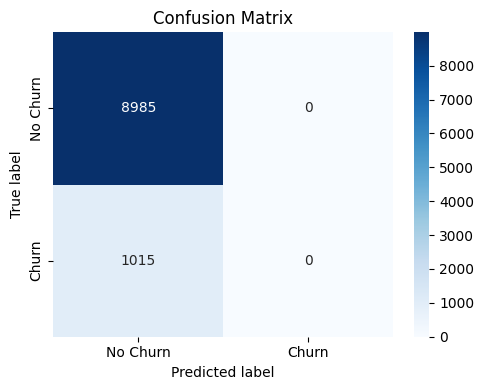

In [69]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(cm)
print(classification_report(y_test, y_pred,zero_division=0))
plot_confusion_matrix(cm)

Although the overall accuracy is high, the model is ineffective for the real task identifying churn. It provides no practical value for churn prediction because it never detects the minority class.

### Function-based methods model

Function-based methods model classification as a mathematical function that maps input features to a class label.
Instead of relying on explicit probability distributions, these methods learn a decision function whose parameters are optimized from the training data.

#### Support Vector Machine
Support Vector Machine is a function-based classifier that finds the optimal separating boundary between classes.
It constructs a hyperplane that maximizes the margin—the distance between the closest data points of each class. By maximizing this margin, SVM achieves strong generalization

#### Scale features

SVM relies on distances between data points to construct the separating hyperplane. Scaling puts all features on a comparable range

In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc  = scaler.transform(X_test)

In [71]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1.0, gamma='scale', class_weight='balanced', random_state=random_state)
svm.fit(X_train_sc, y_train)


,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",'balanced'
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


Accuracy: 0.6379
[[5920 3065]
 [ 556  459]]
              precision    recall  f1-score   support

           0       0.91      0.66      0.77      8985
           1       0.13      0.45      0.20      1015

    accuracy                           0.64     10000
   macro avg       0.52      0.56      0.48     10000
weighted avg       0.83      0.64      0.71     10000



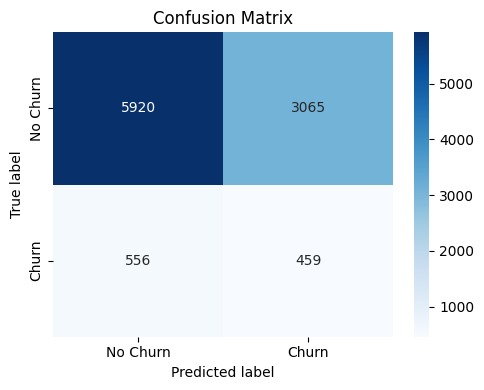

In [72]:
y_pred = svm.predict(X_test_sc)

cm = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(cm)
print(classification_report(y_test, y_pred,zero_division=0))
plot_confusion_matrix(cm)

The SVM model significantly improves over Naive Bayes by actually detecting churned customers. It identifies 459 churn cases instead of none, achieving a recall of 45% for the minority class. However, this comes at the cost of overall accuracy, which drops to 64%, and many non-churn customers are misclassified as churn. SVM sacrifices accuracy on the majority class to gain the ability to recognize the minority class. Unlike the Bayes model, it provides practical value for churn prediction, even though its precision for churn remains low.

### Tree-based
Tree-based methods classify data by recursively splitting it according to feature values, forming a hierarchical tree structure.

#### Decision Tree

A Decision Tree is a tree-based classifier that represents decisions as a hierarchical structure of rules.
Each internal node tests a feature, each branch corresponds to an outcome of that test, and each leaf node represents a class label. The model recursively splits the data to maximize class separation using Gini impurity or entropy, producing an interpretable set of “if–then” rules. Decision Trees can naturally handle both numeric and categorical features and capture non-linear relationships without requiring feature scaling.


In [73]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    max_depth=6,                 
    min_samples_leaf=20,         
    class_weight="balanced",     
    random_state=random_state
)
dt.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",6
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",20
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",67
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current n

Accuracy: 0.6438
[[5933 3052]
 [ 510  505]]
              precision    recall  f1-score   support

           0       0.92      0.66      0.77      8985
           1       0.14      0.50      0.22      1015

    accuracy                           0.64     10000
   macro avg       0.53      0.58      0.50     10000
weighted avg       0.84      0.64      0.71     10000



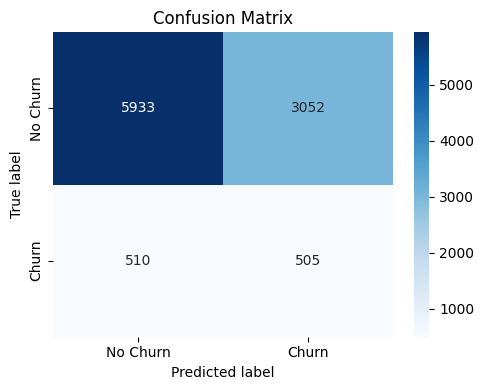

In [74]:
y_pred = dt.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(cm)
print(classification_report(y_test, y_pred,zero_division=0))
plot_confusion_matrix(cm)

The Decision Tree model achieves a balanced behavior between accuracy and minority-class detection. With an overall accuracy of 64%, it correctly identifies 505 churn cases, reaching a recall of 50% for the churn class—slightly better than SVM. While it misclassifies a significant number of non-churn customers as churn, it demonstrates that tree-based methods can effectively capture non-linear patterns and handle class imbalance better than the Bayes-based approach. This makes the Decision Tree a more practical model for churn detection, even though further tuning or ensemble methods would be needed for higher precision.

### Meta-methods

Meta-methods combine multiple simple models into a single, stronger classifier.
Instead of relying on one learner, they aggregate the predictions of several weak models to improve accuracy and generalization. Common strategies include bagging, boosting, and stacking.

#### Adaptive Boosting
AdaBoost is a meta-method that trains a sequence of weak classifiers iteratively. Each new model focuses more on the samples that were misclassified by previous ones by increasing their weights. The final prediction is a weighted combination of all models.

In [75]:
from sklearn.ensemble import AdaBoostClassifier

base = DecisionTreeClassifier(
    max_depth=1,             
    class_weight="balanced",
    random_state=random_state
)

ada = AdaBoostClassifier(
    estimator=base,
    n_estimators=200,        
    learning_rate=0.5,       
    random_state=random_state
)

ada.fit(X_train, y_train)

,"estimator estimator: object, default=NoneThe base estimator from which the boosted ensemble is built.Support for sample weighting is required, as well as proper``classes_`` and ``n_classes_`` attributes. If ``None``, thenthe base estimator is :class:`~sklearn.tree.DecisionTreeClassifier`initialized with `max_depth=1`... versionadded:: 1.2 `base_estimator` was renamed to `estimator`.",DecisionTreeC...ndom_state=67)
,"n_estimators n_estimators: int, default=50The maximum number of estimators at which boosting is terminated.In case of perfect fit, the learning procedure is stopped early.Values must be in the range `[1, inf)`.",200
,"learning_rate learning_rate: float, default=1.0Weight applied to each classifier at each boosting iteration. A higherlearning rate increases the contribution of each classifier. There isa trade-off between the `learning_rate` and `n_estimators` parameters.Values must be in the range `(0.0, inf)`.",0.5
,"random_state random_state: int, RandomState instance or None, default=NoneControls the random seed given at each `estimator` at eachboosting iteration.Thus, it is only used when `estimator` exposes a `random_state`.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",67
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",1
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None


Accuracy: 0.7353
[[7038 1947]
 [ 700  315]]
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      8985
           1       0.14      0.31      0.19      1015

    accuracy                           0.74     10000
   macro avg       0.52      0.55      0.52     10000
weighted avg       0.83      0.74      0.78     10000



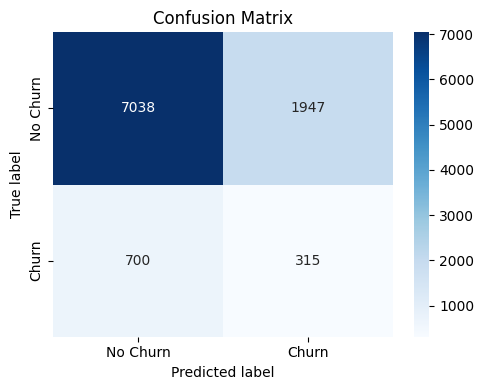

In [76]:
y_pred = ada.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(cm)
print(classification_report(y_test, y_pred,zero_division=0))
plot_confusion_matrix(cm)

AdaBoost achieves the best overall performance among the tested models, with an accuracy of 73.5% and improved balance between classes. It correctly identifies 315 churn cases, reaching a recall of 31% for the minority class—higher than both SVM and the single Decision Tree. Although precision for churn remains low, the model reduces the bias toward the majority class while maintaining strong performance on non-churn customers. This confirms the advantage of meta-methods: by combining multiple weak learners, AdaBoost produces a more generalizable classifier for imbalanced problems like churn prediction.

### Conclusion

Across all tested approaches, the experiments clearly show how different supervised learning paradigms behave on an imbalanced churn dataset:

* The Bayes-based model (Gaussian Naive Bayes) achieved high accuracy but completely failed to detect churn, predicting only the majority class. This makes it unsuitable for practical churn prediction despite its simplicity.
* The Function-based model (SVM) began to recognize churn cases, significantly improving recall for the minority class, but at the cost of lower overall accuracy and many false positives.
* The Tree-based model (Decision Tree) provided a better balance, capturing non-linear patterns and improving churn recall while remaining interpretable.
* The Meta-method (AdaBoost) delivered the strongest overall performance, achieving the highest accuracy and the best trade-off between majority and minority classes. By iteratively focusing on misclassified samples, it reduced class bias and produced a more robust classifier.

In conclusion, while simple models struggle with class imbalance, ensemble-based meta-methods such as AdaBoost demonstrate superior generalization and practical value for real-world problems like churn prediction.